### Veri Seti: Amerika Beyzbol Lig’inin bir yıllına ait veriler ile oyuncuların kariyeri boyunca elde ettikleri istatistikleri kapsayan bir veri seti. Veri seti Sütunlar değişkenleri, satırlar oyuncuları ifade edecek şekilde matris formunda verilmiştir. Veri setinin ana kitle olduğunu varsayalım. Soruları sizinle paylaşılan bu veri seti üzerinden cevaplayınız. Çözümleri python programlama veya herhangi bir istatistiksel paket program kullanarak gerçekleştirebilirsiniz. İlk 10 soruyu bu veri setini kullanarak cevaplayınız.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
df = pd.read_excel('arasınav_Ödev Veri Seti.xlsx')
pd.set_option('display.max_columns', 25)

In [3]:
df.head(1)

,Oyuncular,#Atış,#İsabet,#başarılı,#kaçanAtış,#yakalanan,#yürüyüş,#tecrübe(yıl),#toplamAtış,#toplamİsabet,#toplambaşarılı,#toplamKaçanAtış,#toplamAtış.1,#toplamYürüyüş,LigSeviyesi,LigSonuSeviye,#dışarıAtış,#asist,#hata,#yıllıkMaaş,YeniSezonSeviyesi
0,-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.0,A


In [4]:
a = []
for i in df.columns:
    if i[0] == '#':
        i = i[1:]
    else:
        i = i
    a.append(i.capitalize())

In [5]:
df.columns = a

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Oyuncular          263 non-null    object 
 1   Atış               263 non-null    int64  
 2   İsabet             263 non-null    int64  
 3   Başarılı           263 non-null    int64  
 4   Kaçanatış          263 non-null    int64  
 5   Yakalanan          263 non-null    int64  
 6   Yürüyüş            263 non-null    int64  
 7   Tecrübe(yıl)       263 non-null    int64  
 8   Toplamatış         263 non-null    int64  
 9   Toplami̇sabet      263 non-null    int64  
 10  Toplambaşarılı     263 non-null    int64  
 11  Toplamkaçanatış    263 non-null    int64  
 12  Toplamatış.1       263 non-null    int64  
 13  Toplamyürüyüş      263 non-null    int64  
 14  Ligseviyesi        263 non-null    object 
 15  Ligsonuseviye      263 non-null    object 
 16  Dışarıatış         263 non

In [7]:
df.nunique()

Oyuncular            263
Atış                 209
İsabet               130
Başarılı              35
Kaçanatış             92
Yakalanan             94
Yürüyüş               87
Tecrübe(yıl)          21
Toplamatış           257
Toplami̇sabet        241
Toplambaşarılı       129
Toplamkaçanatış      226
Toplamatış.1         226
Toplamyürüyüş        207
Ligseviyesi            2
Ligsonuseviye          2
Dışarıatış           199
Asist                145
Hata                  29
Yıllıkmaaş           150
Yenisezonseviyesi      2
dtype: int64

In [8]:
df.head()

,Oyuncular,Atış,İsabet,Başarılı,Kaçanatış,Yakalanan,Yürüyüş,Tecrübe(yıl),Toplamatış,Toplami̇sabet,Toplambaşarılı,Toplamkaçanatış,Toplamatış.1,Toplamyürüyüş,Ligseviyesi,Ligsonuseviye,Dışarıatış,Asist,Hata,Yıllıkmaaş,Yenisezonseviyesi
0,-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.000,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
2,-Alan Trammell,574,159,21,107,75,59,10,4631,1300,90,702,504,488,A,E,238,445,22,517.143,A
3,-Alan Wiggins,239,60,0,30,11,22,6,1941,510,4,309,103,207,A,E,121,151,6,700.000,A
4,-Alex Trevino,202,53,4,31,26,27,9,1876,467,15,192,186,161,N,W,304,45,11,512.500,N


## Soru 1: Değişkenlerin ölçme düzeyleri nedir? (5p)

In [9]:
df_olcme = pd.DataFrame(data = a, columns = ['degiskenler'])

In [10]:
b = ['Nominal', 'Ratio', 'Ratio', 'Ratio', 'Ratio', 'Ratio', 'Interval', 'Ratio', 'Ratio', 'Ratio',
     'Ratio', 'Ratio', 'Ratio', 'Interval', 'Ordinal', 'Ordinal', 'Ratio', 'Ratio', 'Ratio', 'Interval',
     'Ordinal']

In [11]:
df_olcme['olcme_duzeyı'] = b

In [12]:
df_olcme

,degiskenler,olcme_duzeyı
0,Oyuncular,Nominal
1,Atış,Ratio
2,İsabet,Ratio
3,Başarılı,Ratio
4,Kaçanatış,Ratio
5,Yakalanan,Ratio
6,Yürüyüş,Interval
7,Tecrübe(yıl),Ratio
8,Toplamatış,Ratio
9,Toplami̇sabet,Ratio


## Soru 2: Değişkenlerin her biri için ilgili merkezi eğilim ölçüsünü hesaplayınız. Sonuçları tablo şeklinde veriniz.(5p)
## Soru 3: Değişkenlerin her biri için ilgili dağılım ölçülerini hesaplayınız. Sonuçları tablo şeklinde veriniz. (10p)

In [13]:
# %50 = median, %25 = Q1, %75 = Q3
df.describe()

,Atış,İsabet,Başarılı,Kaçanatış,Yakalanan,Yürüyüş,Tecrübe(yıl),Toplamatış,Toplami̇sabet,Toplambaşarılı,Toplamkaçanatış,Toplamatış.1,Toplamyürüyüş,Dışarıatış,Asist,Hata,Yıllıkmaaş
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,535.925882
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,451.118681
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,190.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,425.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,2460.000000


In [14]:
# top = mode, freq = frequency of the mode
df[['Oyuncular', 'Ligseviyesi', 'Ligsonuseviye', 'Yenisezonseviyesi']].describe()

,Oyuncular,Ligseviyesi,Ligsonuseviye,Yenisezonseviyesi
count,263,263,263,263
unique,263,2,2,2
top,-Ruben Sierra,A,W,A
freq,1,139,134,141


### Mean

In [15]:
df.describe().loc['mean']

Atış                403.642586
İsabet              107.828897
Başarılı             11.619772
Kaçanatış            54.745247
Yakalanan            51.486692
Yürüyüş              41.114068
Tecrübe(yıl)          7.311787
Toplamatış         2657.543726
Toplami̇sabet       722.186312
Toplambaşarılı       69.239544
Toplamkaçanatış     361.220532
Toplamatış.1        330.418251
Toplamyürüyüş       260.266160
Dışarıatış          290.711027
Asist               118.760456
Hata                  8.593156
Yıllıkmaaş          535.925882
Name: mean, dtype: float64

### Median

In [16]:
df.describe().loc['50%']

Atış                413.0
İsabet              103.0
Başarılı              9.0
Kaçanatış            52.0
Yakalanan            47.0
Yürüyüş              37.0
Tecrübe(yıl)          6.0
Toplamatış         1931.0
Toplami̇sabet       516.0
Toplambaşarılı       40.0
Toplamkaçanatış     250.0
Toplamatış.1        230.0
Toplamyürüyüş       174.0
Dışarıatış          224.0
Asist                45.0
Hata                  7.0
Yıllıkmaaş          425.0
Name: 50%, dtype: float64

### Mode

In [17]:
df[['Oyuncular', 'Ligseviyesi', 'Ligsonuseviye', 'Yenisezonseviyesi']].describe().loc['top']

Oyuncular            -Ruben Sierra
Ligseviyesi                      A
Ligsonuseviye                    W
Yenisezonseviyesi                A
Name: top, dtype: object

### Quartile-1 (Q1)

In [18]:
df.describe().loc['25%']

Atış               282.5
İsabet              71.5
Başarılı             5.0
Kaçanatış           33.5
Yakalanan           30.0
Yürüyüş             23.0
Tecrübe(yıl)         4.0
Toplamatış         842.5
Toplami̇sabet      212.0
Toplambaşarılı      15.0
Toplamkaçanatış    105.5
Toplamatış.1        95.0
Toplamyürüyüş       71.0
Dışarıatış         113.5
Asist                8.0
Hata                 3.0
Yıllıkmaaş         190.0
Name: 25%, dtype: float64

### Quartile-3 (Q3)

In [19]:
df.describe().loc['75%']

Atış                526.0
İsabet              141.5
Başarılı             18.0
Kaçanatış            73.0
Yakalanan            71.0
Yürüyüş              57.0
Tecrübe(yıl)         10.0
Toplamatış         3890.5
Toplami̇sabet      1054.0
Toplambaşarılı       92.5
Toplamkaçanatış     497.5
Toplamatış.1        424.5
Toplamyürüyüş       328.5
Dışarıatış          322.5
Asist               192.0
Hata                 13.0
Yıllıkmaaş          750.0
Name: 75%, dtype: float64

### Range

In [20]:
degiskenler = []
for i in df.columns:
    if df[i].dtype != 'object':
        degiskenler.append(i)
df_range = pd.DataFrame(data = degiskenler, columns = ['degiskenler'])
Range = []
for i in df.columns:
    if df[i].dtype != 'object':
        r = df[i].max() - df[i].min()
        Range.append(r)
df_range['R'] = Range
df_range

,degiskenler,R
0,Atış,668.0
1,İsabet,237.0
2,Başarılı,40.0
3,Kaçanatış,130.0
4,Yakalanan,121.0
5,Yürüyüş,105.0
6,Tecrübe(yıl),23.0
7,Toplamatış,14034.0
8,Toplami̇sabet,4252.0
9,Toplambaşarılı,548.0


### Standard Deviation

In [21]:
df.describe().loc['std']

Atış                147.307209
İsabet               45.125326
Başarılı              8.757108
Kaçanatış            25.539816
Yakalanan            25.882714
Yürüyüş              21.718056
Tecrübe(yıl)          4.793616
Toplamatış         2286.582929
Toplami̇sabet       648.199644
Toplambaşarılı       82.197581
Toplamkaçanatış     331.198571
Toplamatış.1        323.367668
Toplamyürüyüş       264.055868
Dışarıatış          279.934575
Asist               145.080577
Hata                  6.606574
Yıllıkmaaş          451.118681
Name: std, dtype: float64

### Variance

In [22]:
df.describe().loc['std'] ** 2

Atış               2.169941e+04
İsabet             2.036295e+03
Başarılı           7.668694e+01
Kaçanatış          6.522822e+02
Yakalanan          6.699149e+02
Yürüyüş            4.716740e+02
Tecrübe(yıl)       2.297875e+01
Toplamatış         5.228461e+06
Toplami̇sabet      4.201628e+05
Toplambaşarılı     6.756442e+03
Toplamkaçanatış    1.096925e+05
Toplamatış.1       1.045666e+05
Toplamyürüyüş      6.972550e+04
Dışarıatış         7.836337e+04
Asist              2.104837e+04
Hata               4.364682e+01
Yıllıkmaaş         2.035081e+05
Name: std, dtype: float64

## Soru 4: Değişkenlerin her birinin hangi olasılık dağılımına sahip olabileceğini grafikler ve teorik bilgiye dayanacak şekilde açıklayınız. Hangi değişkenler sürekli hangi değişkenler kesikli dağılıma sahiptir? (10p)

<AxesSubplot:ylabel='Density'>

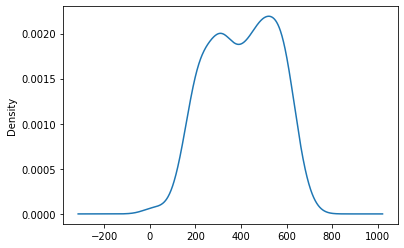

In [23]:
df['Atış'].plot(kind = 'kde')

<AxesSubplot:ylabel='Frequency'>

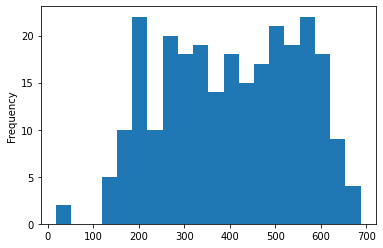

In [24]:
df['Atış'].plot(kind = 'hist', bins = 20)

#### Tüm değişkenleri tek tek çizmek yerine pairplot çizdiriyoruz.

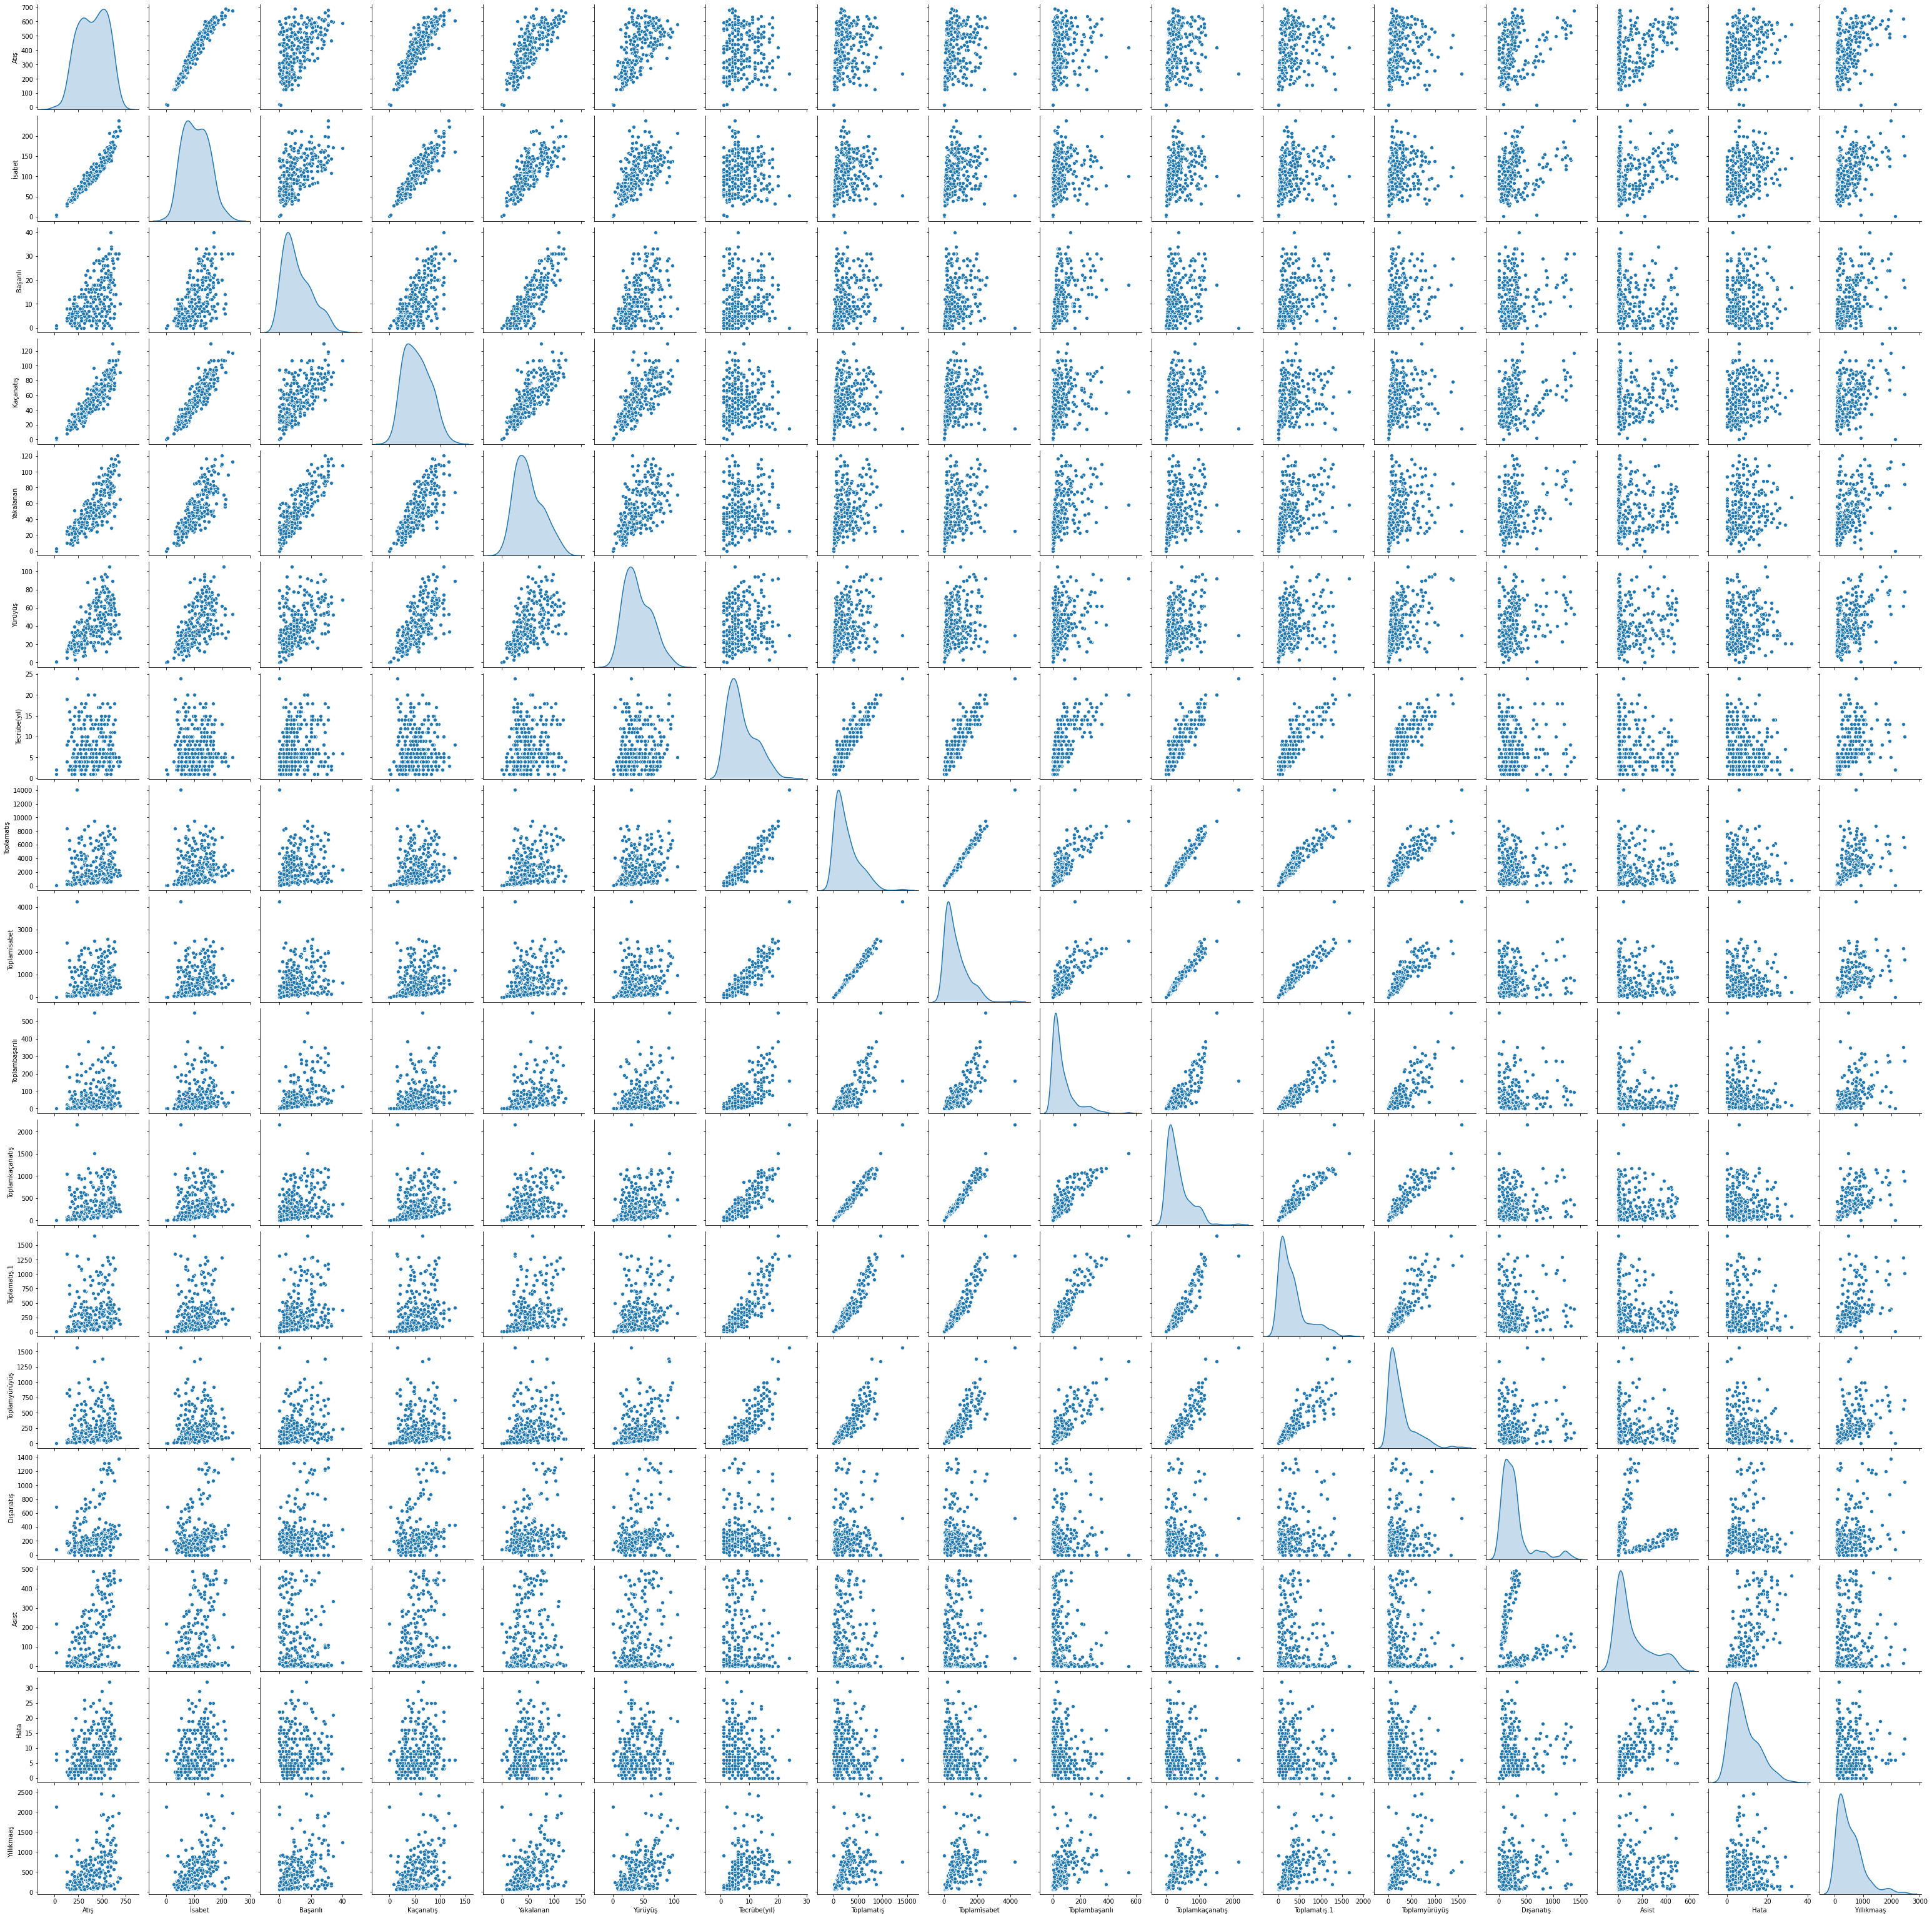

In [25]:
sns.pairplot(df, diag_kind = 'kde')

#### Pairplotun diagonal hattı değişkenlerin dağılımını KDE plot olarak çizmiş durumda, grafik olarak normal dağılıma en çok benzeyen değişkenlere normallik testi olarak, Shapiro-Wilk Testini uyguluyoruz.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

In [26]:
from scipy.stats import shapiro

In [27]:
stat, p = shapiro(df['Atış'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data Gaussian (fail to reject H0)')
else:
    print('Data Gaussian değil (reject H0)')

Statistics=0.969, p=0.000
Data Gaussian değil (reject H0)


In [28]:
stat, p = shapiro(df['İsabet'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data Gaussian (fail to reject H0)')
else:
    print('Data Gaussian değil (reject H0)')

Statistics=0.983, p=0.003
Data Gaussian değil (reject H0)


In [29]:
stat, p = shapiro(df['Başarılı'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data Gaussian (fail to reject H0)')
else:
    print('Data Gaussian değil (reject H0)')

Statistics=0.926, p=0.000
Data Gaussian değil (reject H0)


In [30]:
stat, p = shapiro(df['Kaçanatış'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data Gaussian (fail to reject H0)')
else:
    print('Data Gaussian değil (reject H0)')

Statistics=0.977, p=0.000
Data Gaussian değil (reject H0)


In [31]:
stat, p = shapiro(df['Yakalanan'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data Gaussian (fail to reject H0)')
else:
    print('Data Gaussian değil (reject H0)')

Statistics=0.962, p=0.000
Data Gaussian değil (reject H0)


In [32]:
stat, p = shapiro(df['Yürüyüş'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data Gaussian (fail to reject H0)')
else:
    print('Data Gaussian değil (reject H0)')

Statistics=0.965, p=0.000
Data Gaussian değil (reject H0)


#### Yukarda belirtilen değişkenler, uygulanan normallik testine göre normal dağılıma ait değil ancak grafiklerine ve descriptive istatistik bilgilerine bakarak normal dağılıma yakın olduklarını söyleyebiliriz.

#### Aşağıda bulunan diğer değişkenler, KDE plotlarına bakarak; exponential dağılıma yakın olduklarını söyleyebiliriz. Test olarak Anderson-Darling testini uygulayarak sonuçları kontrol edicez. 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html

In [33]:
from scipy.stats import anderson

In [34]:
stat, crt, sig_lvl = anderson(df['Tecrübe(yıl)'], dist = 'expon')
alpha = 0.05
if crt[2] > alpha:
    print('Data Exponential değil (fail to reject H0)')
else:
    print('Data Exponential (reject H0)')

Data Exponential değil (fail to reject H0)


In [35]:
stat, crt, sig_lvl = anderson(df['Toplamatış'], dist = 'expon')
alpha = 0.05
if crt[2] > alpha:
    print('Data Exponential değil (fail to reject H0)')
else:
    print('Data Exponential (reject H0)')

Data Exponential değil (fail to reject H0)


In [36]:
stat, crt, sig_lvl = anderson(df['Toplami̇sabet'], dist = 'expon')
alpha = 0.05
if crt[2] > alpha:
    print('Data Exponential değil (fail to reject H0)')
else:
    print('Data Exponential (reject H0)')

Data Exponential değil (fail to reject H0)


In [37]:
stat, crt, sig_lvl = anderson(df['Toplambaşarılı'], dist = 'expon')
alpha = 0.05
if crt[2] > alpha:
    print('Data Exponential değil (fail to reject H0)')
else:
    print('Data Exponential (reject H0)')

Data Exponential değil (fail to reject H0)


In [38]:
stat, crt, sig_lvl = anderson(df['Toplamkaçanatış'], dist = 'expon')
alpha = 0.05
if crt[2] > alpha:
    print('Data Exponential değil (fail to reject H0)')
else:
    print('Data Exponential (reject H0)')

Data Exponential değil (fail to reject H0)


In [39]:
stat, crt, sig_lvl = anderson(df['Toplamatış.1'], dist = 'expon')
alpha = 0.05
if crt[2] > alpha:
    print('Data Exponential değil (fail to reject H0)')
else:
    print('Data Exponential (reject H0)')

Data Exponential değil (fail to reject H0)


In [40]:
stat, crt, sig_lvl = anderson(df['Toplamyürüyüş'], dist = 'expon')
alpha = 0.05
if crt[2] > alpha:
    print('Data Exponential değil (fail to reject H0)')
else:
    print('Data Exponential (reject H0)')

Data Exponential değil (fail to reject H0)


In [41]:
stat, crt, sig_lvl = anderson(df['Dışarıatış'], dist = 'expon')
alpha = 0.05
if crt[2] > alpha:
    print('Data Exponential değil (fail to reject H0)')
else:
    print('Data Exponential (reject H0)')

Data Exponential değil (fail to reject H0)


In [42]:
stat, crt, sig_lvl = anderson(df['Asist'], dist = 'expon')
alpha = 0.05
if crt[2] > alpha:
    print('Data Exponential değil (fail to reject H0)')
else:
    print('Data Exponential (reject H0)')

Data Exponential değil (fail to reject H0)


In [43]:
stat, crt, sig_lvl = anderson(df['Hata'], dist = 'expon')
alpha = 0.05
if crt[2] > alpha:
    print('Data Exponential değil (fail to reject H0)')
else:
    print('Data Exponential (reject H0)')

Data Exponential değil (fail to reject H0)


In [44]:
stat, crt, sig_lvl = anderson(df['Yıllıkmaaş'], dist = 'expon')
alpha = 0.05
if crt[2] > alpha:
    print('Data Exponential değil (fail to reject H0)')
else:
    print('Data Exponential (reject H0)')

Data Exponential değil (fail to reject H0)


In [45]:
df.head()

,Oyuncular,Atış,İsabet,Başarılı,Kaçanatış,Yakalanan,Yürüyüş,Tecrübe(yıl),Toplamatış,Toplami̇sabet,Toplambaşarılı,Toplamkaçanatış,Toplamatış.1,Toplamyürüyüş,Ligseviyesi,Ligsonuseviye,Dışarıatış,Asist,Hata,Yıllıkmaaş,Yenisezonseviyesi
0,-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.000,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
2,-Alan Trammell,574,159,21,107,75,59,10,4631,1300,90,702,504,488,A,E,238,445,22,517.143,A
3,-Alan Wiggins,239,60,0,30,11,22,6,1941,510,4,309,103,207,A,E,121,151,6,700.000,A
4,-Alex Trevino,202,53,4,31,26,27,9,1876,467,15,192,186,161,N,W,304,45,11,512.500,N


## Soru 5: Değişkenler arasındaki korelasyonları hesaplayıp en yüksek korelasyona sahip değişkenleri belirleyiniz.(10p)

<AxesSubplot:>

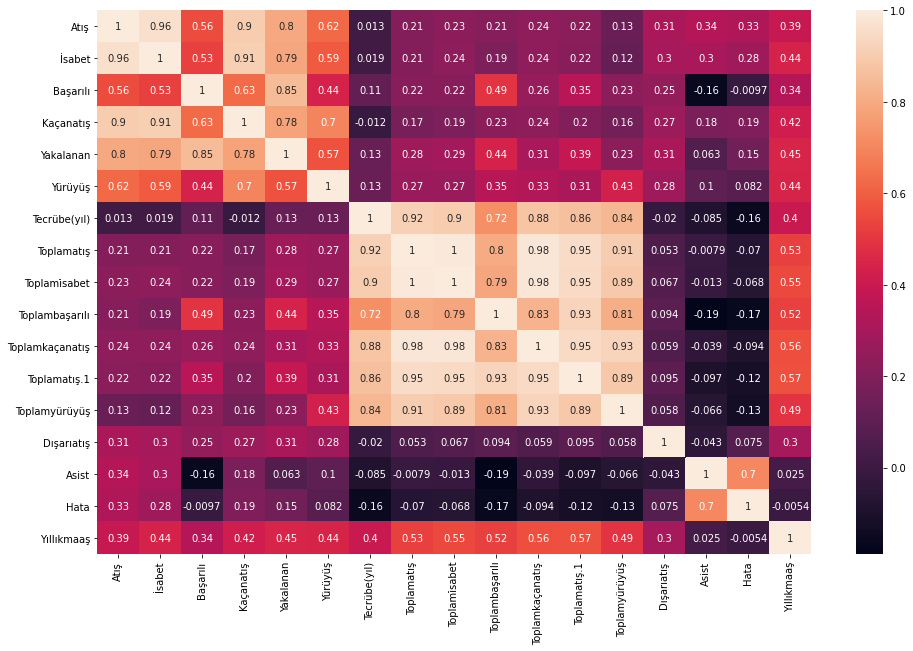

In [46]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True)

* Oyuncuların isminin olduğu değişkeni düşürüp ve categorical verileri numericale çevirerek korealasyonu tekrardan kontrol ediyoruz

<AxesSubplot:>

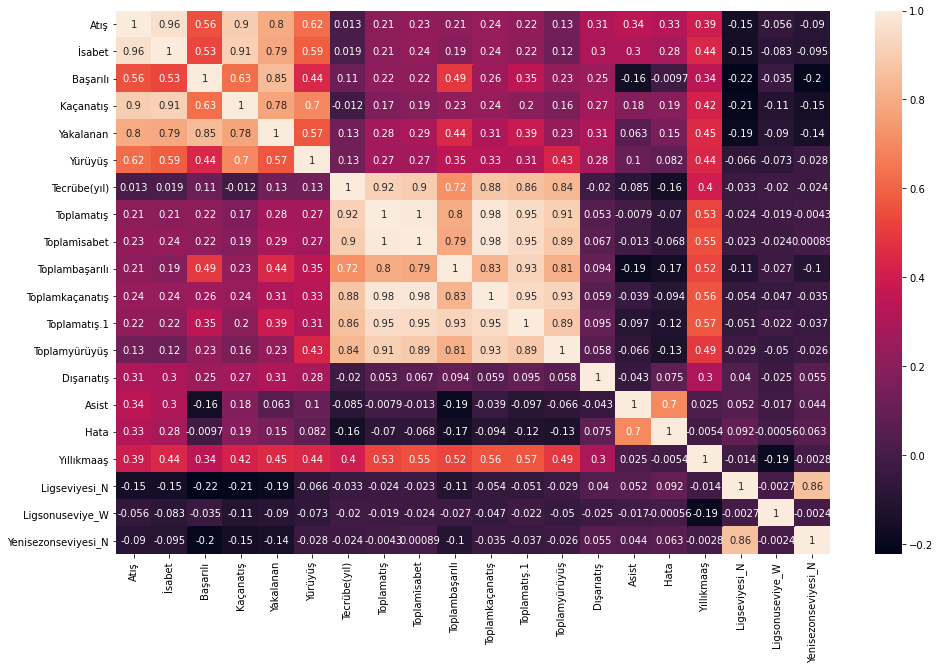

In [47]:
plt.figure(figsize = (16, 10))
sns.heatmap(pd.get_dummies(df.drop('Oyuncular', axis = 1), drop_first = True).corr(), annot = True)

#### Birbiri ile korelasyonu 0.95'den büyük olan değişkenler aşağıda gösterilmiştir.

In [48]:
df1 = pd.get_dummies(df.drop('Oyuncular', axis = 1), drop_first = True).corr()

In [49]:
a = []
b = []
for i in df1.columns:
    for ii in range(len(df1.columns)):
        if (df1[i].iloc[ii] > 0.95) and (df1[i].iloc[ii] < 0.99):
            a.append(i)
            b.append(df1[i].iloc[ii])

In [50]:
df2 = (df1 > 0.95 ) & (df1 < 1) 

In [51]:
df2.applymap(lambda x: True if x else np.nan).dropna(how = 'all', axis = 1).dropna(how = 'all').fillna('-')

,Atış,İsabet,Toplamatış,Toplami̇sabet,Toplamkaçanatış,Toplamatış.1
Atış,-,True,-,-,-,-
İsabet,True,-,-,-,-,-
Toplamatış,-,-,-,True,True,True
Toplami̇sabet,-,-,True,-,True,-
Toplamkaçanatış,-,-,True,True,-,-
Toplamatış.1,-,-,True,-,-,-


In [52]:
a

['Atış',
 'İsabet',
 'Toplamatış',
 'Toplamatış',
 'Toplami̇sabet',
 'Toplamkaçanatış',
 'Toplamkaçanatış',
 'Toplamatış.1']

In [53]:
b

[0.9639691287146576,
 0.9639691287146576,
 0.9827469414631294,
 0.9507301414199297,
 0.9845418443504339,
 0.9827469414631294,
 0.9845418443504339,
 0.9507301414199297]

## Soru 6: İlgili veri seti için varyans-kovaryans matrisini hesaplayarak. Sonuçları yorumlayınız. (10p)

In [54]:
df2 = pd.get_dummies(df.drop('Oyuncular', axis = 1))

In [55]:
df2.cov()

,Atış,İsabet,Başarılı,Kaçanatış,Yakalanan,Yürüyüş,Tecrübe(yıl),Toplamatış,Toplami̇sabet,Toplambaşarılı,Toplamkaçanatış,Toplamatış.1,Toplamyürüyüş,Dışarıatış,Asist,Hata,Yıllıkmaaş,Ligseviyesi_A,Ligseviyesi_N,Ligsonuseviye_E,Ligsonuseviye_W,Yenisezonseviyesi_A,Yenisezonseviyesi_N
Atış,21699.413752,6407.778307,716.073506,3385.336081,3034.976141,1997.750849,8.985908,6.977984e+04,2.151661e+04,2572.063042,11576.292863,10545.928685,5170.454271,12767.090979,7311.532377,316.850216,26233.726885,11.285040,-11.285040,4.156895,-4.156895,6.612196,-6.612196
İsabet,6407.778307,2036.295040,209.686602,1049.494413,920.915653,575.584477,4.023017,2.132557e+04,6.891521e+03,702.388471,3570.408107,3201.270310,1465.270905,3785.694642,1990.065727,83.437756,8930.047900,3.464822,-3.464822,1.881955,-1.881955,2.141700,-2.141700
Başarılı,716.073506,209.686602,76.686936,141.143224,192.456753,83.768728,4.764041,4.354459e+03,1.234583e+03,354.526543,749.294096,990.716890,525.330595,615.137796,-205.312803,-0.563681,1355.130669,0.976533,-0.976533,0.152860,-0.152860,0.872566,-0.872566
Kaçanatış,3385.336081,1049.494413,141.143224,652.282182,514.746597,386.616956,-1.466070,1.003356e+04,3.167399e+03,482.213929,2011.754869,1671.038255,1103.984094,1938.651293,664.209735,32.499013,4837.395321,2.631338,-2.631338,1.377340,-1.377340,1.976794,-1.976794
Yakalanan,3034.976141,920.915653,192.456753,514.746597,669.914899,320.131295,16.088135,1.646032e+04,4.901233e+03,940.757017,2633.640351,3245.547572,1596.663861,2261.053392,236.200998,25.675863,5247.940027,2.405915,-2.405915,1.168766,-1.168766,1.856399,-1.856399
Yürüyüş,1997.750849,575.584477,83.768728,386.616956,320.131295,471.673962,14.033001,1.338092e+04,3.812154e+03,624.064174,2395.096886,2196.043712,2461.022959,1707.498737,323.035062,11.756509,4348.754338,0.714292,-0.714292,0.791165,-0.791165,0.308841,-0.308841
Tecrübe(yıl),8.985908,4.023017,4.764041,-1.466070,16.088135,14.033001,22.978754,1.003678e+04,2.789800e+03,284.631135,1391.801207,1338.991234,1060.122805,-26.863756,-59.196021,-4.956637,866.416621,0.078861,-0.078861,0.048777,-0.048777,0.057397,-0.057397
Toplamatış,69779.840116,21325.574304,4354.459437,10033.562709,16460.318332,13380.922474,10036.776391,5.228461e+06,1.474836e+06,150676.292921,744247.032305,702976.512176,547459.476867,34176.207340,-2619.831089,-1064.667257,542719.238984,27.108481,-27.108481,21.327707,-21.327707,4.905857,-4.905857
Toplami̇sabet,21516.612646,6891.520550,1234.582562,3167.398790,4901.233405,3812.154239,2789.800467,1.474836e+06,4.201628e+05,41913.168940,211364.195397,198455.177503,152456.183046,12220.527327,-1236.096421,-291.355209,160509.371201,7.408789,-7.408789,7.675442,-7.675442,-0.287290,0.287290
Toplambaşarılı,2572.063042,702.388471,354.526543,482.213929,940.757017,624.064174,284.631135,1.506763e+05,4.191317e+04,6756.442400,22476.580559,24663.689505,17599.913099,2158.844295,-2252.522552,-89.802934,19464.878956,4.411082,-4.411082,1.111064,-1.111064,4.119177,-4.119177


### Kovaryans matirisinde bulunan negatif değerler değişkenler arasında ters yönlü bir korelasyon/ilişki olduğunu, pozitif değerler ise aynı yönde bir korelasyon/ilişki olduğunu gösterir. Aradaki korelasyon şiddetine ise korelasyon matrisi ile bakabiliriz. Soru-5'te detaylı olarak korelasyonlar incelendi. Kovaryans matrisinin neticesini (ters/negatif veya aynı/pozitif yönlü korelasyon ) scatter-plot ile de görebiliriz.

## Soru 7: Sezon sonu seviyesi E olan bir oyuncunun yıllık maaşının 600 (bin dolar)’dan yüksek olma olasılığı nedir? (10p)

In [56]:
df.head()

,Oyuncular,Atış,İsabet,Başarılı,Kaçanatış,Yakalanan,Yürüyüş,Tecrübe(yıl),Toplamatış,Toplami̇sabet,Toplambaşarılı,Toplamkaçanatış,Toplamatış.1,Toplamyürüyüş,Ligseviyesi,Ligsonuseviye,Dışarıatış,Asist,Hata,Yıllıkmaaş,Yenisezonseviyesi
0,-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.000,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
2,-Alan Trammell,574,159,21,107,75,59,10,4631,1300,90,702,504,488,A,E,238,445,22,517.143,A
3,-Alan Wiggins,239,60,0,30,11,22,6,1941,510,4,309,103,207,A,E,121,151,6,700.000,A
4,-Alex Trevino,202,53,4,31,26,27,9,1876,467,15,192,186,161,N,W,304,45,11,512.500,N


#### Hem sezon sonu seviyesi E hem de maaşının 600 bin dolardan yüksek olma olasılığı

In [57]:
(df['Ligsonuseviye'] == 'E') & (df['Yıllıkmaaş'] > 600.000)

0      False
1      False
2      False
3       True
4      False
       ...  
258    False
259     True
260     True
261     True
262    False
Length: 263, dtype: bool

In [58]:
((df['Ligsonuseviye'] == 'E') & (df['Yıllıkmaaş'] > 600.000)).mean()

0.20152091254752852

#### Sezon sonu seviyesi E olan birisinin maaşının 600 bin dolardan yüksek olma olasılığı

In [59]:
df_E = df[df['Ligsonuseviye'] == 'E']

In [60]:
df_E['Yıllıkmaaş'] > 600.000

0      False
2      False
3       True
7      False
8       True
       ...  
254     True
255    False
259     True
260     True
261     True
Name: Yıllıkmaaş, Length: 129, dtype: bool

In [61]:
(df_E['Yıllıkmaaş'] > 600.000).mean()

0.4108527131782946

### Soru 8: Lig seviyesini bağımlı değişken olarak ele alıp, #başarılı değişkeni arasındaki ilişkiyi Bayes Ağları ile bir oyununun başarı durumuna göre lig seviyesini tahmin edecek model oluşturunuz. (10p)

In [62]:
df.head()

,Oyuncular,Atış,İsabet,Başarılı,Kaçanatış,Yakalanan,Yürüyüş,Tecrübe(yıl),Toplamatış,Toplami̇sabet,Toplambaşarılı,Toplamkaçanatış,Toplamatış.1,Toplamyürüyüş,Ligseviyesi,Ligsonuseviye,Dışarıatış,Asist,Hata,Yıllıkmaaş,Yenisezonseviyesi
0,-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.000,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
2,-Alan Trammell,574,159,21,107,75,59,10,4631,1300,90,702,504,488,A,E,238,445,22,517.143,A
3,-Alan Wiggins,239,60,0,30,11,22,6,1941,510,4,309,103,207,A,E,121,151,6,700.000,A
4,-Alex Trevino,202,53,4,31,26,27,9,1876,467,15,192,186,161,N,W,304,45,11,512.500,N


In [63]:
df['Başarılı'].value_counts()

5     18
4     17
8     16
3     14
6     14
7     13
9     12
2     12
13    11
10    10
0     10
1     10
20     9
18     9
16     9
21     8
12     8
14     6
11     6
17     6
31     6
29     5
15     4
19     4
24     4
28     4
22     3
26     3
27     3
23     2
25     2
33     2
34     1
30     1
40     1
Name: Başarılı, dtype: int64

In [64]:
df.groupby('Ligseviyesi')['Başarılı'].mean()

Ligseviyesi
A    13.460432
N     9.556452
Name: Başarılı, dtype: float64

In [65]:
df['Ligseviyesi'].value_counts()

A    139
N    124
Name: Ligseviyesi, dtype: int64

<AxesSubplot:ylabel='Density'>

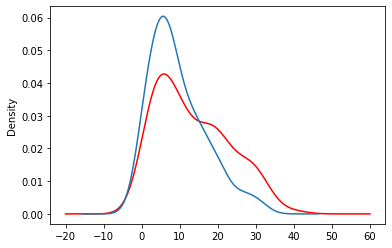

In [66]:
df[df['Ligseviyesi'] == 'A']['Başarılı'].plot(kind = 'kde', c = 'r')
df[df['Ligseviyesi'] == 'N']['Başarılı'].plot(kind = 'kde')

In [67]:
X = df[['Başarılı']]
y = df[['Ligseviyesi']]

In [68]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [70]:
model.fit(X_train, y_train)

/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [71]:
pred = model.predict(np.linspace(-20, 60, 100).reshape(-1, 1)) == 'A'

In [72]:
a = np.linspace(-20, 60, 100)

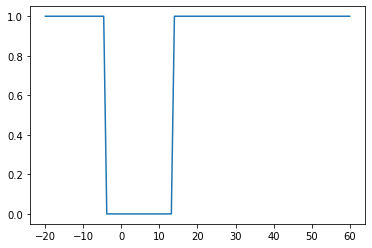

In [73]:
plt.plot(a, pred)

### A olarak tahminlenenler True oldu yani 1, aynı plotlar üzerinde çizebilmek maksadıyla 0.03 ile çarptık

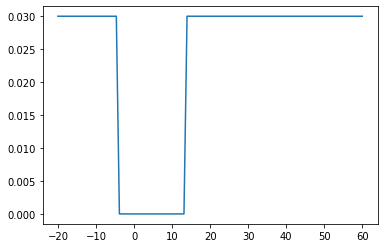

In [74]:
plt.plot(a, pred * 0.03)

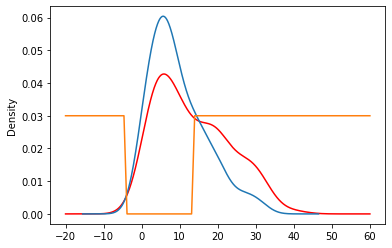

In [75]:
df[df['Ligseviyesi'] == 'A']['Başarılı'].plot(kind = 'kde', c = 'r')
df[df['Ligseviyesi'] == 'N']['Başarılı'].plot(kind = 'kde')
plt.plot(a, pred * 0.03)

(0.02, 0.04)

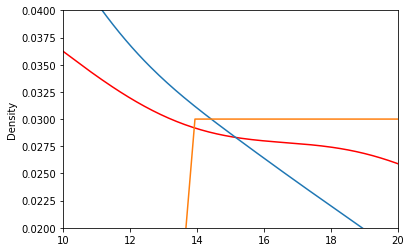

In [76]:
df[df['Ligseviyesi'] == 'A']['Başarılı'].plot(kind = 'kde', c = 'r')
df[df['Ligseviyesi'] == 'N']['Başarılı'].plot(kind = 'kde')
plt.plot(a, pred * 0.03)
plt.xlim(10, 20)
plt.ylim(0.02, 0.04)

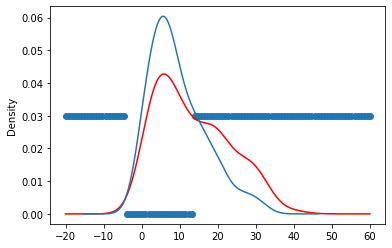

In [77]:
df[df['Ligseviyesi'] == 'A']['Başarılı'].plot(kind = 'kde', c = 'r')
df[df['Ligseviyesi'] == 'N']['Başarılı'].plot(kind = 'kde')
plt.scatter(a, pred * 0.03)

In [78]:
df['Ligseviyesi'].value_counts()

A    139
N    124
Name: Ligseviyesi, dtype: int64

In [79]:
df.groupby('Ligseviyesi')['Başarılı'].mean()

Ligseviyesi
A    13.460432
N     9.556452
Name: Başarılı, dtype: float64

### Grafikleri modelin gördüğü gibi normal dağılım kullanarak çizdik ve daha iyi gözlem yapabildik.

In [80]:
from scipy import stats

In [81]:
x = stats.norm(df.groupby('Ligseviyesi')['Başarılı'].mean()[0], df.groupby('Ligseviyesi')['Başarılı'].std()[0]).pdf(a)

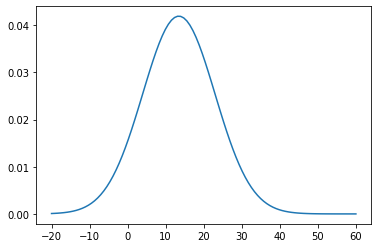

In [82]:
plt.plot(a, x)

In [83]:
z = stats.norm(df.groupby('Ligseviyesi')['Başarılı'].mean()[1], df.groupby('Ligseviyesi')['Başarılı'].std()[1]).pdf(a)

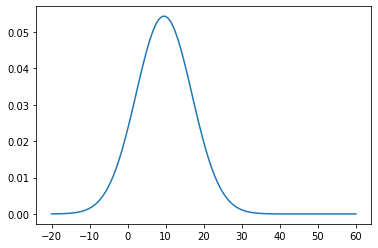

In [84]:
plt.plot(a, z)

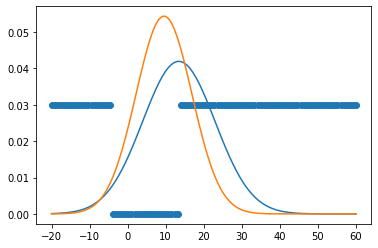

In [85]:
plt.plot(a, x)
plt.plot(a, z)
plt.scatter(a, pred * 0.03)

### Başarılı değişkenini kullanarak, Ligseviyesini tahminlemek üzere bir model oluşturduk. Yukardaki grafiklerde görüldüğü üzere Bayes Ağlarındaki prior (önsel dağılım) tahminlemede etkili oldu. Dağılıma göre 14 değerinde Ligseviyesinin N olması gerekirken datanın genel dağılımı A'da olduğu için , sınır noktalarında tahminler prior'dan dolayı A'ya kaydı.
### Başarılı sütunu verildiğinde Ligseviyesini tahmin etmeye çalışıyoruz, prior olarak P (L) yi kullanıyoruz. Ligseviyesinin çoğunluğu A olarak sınıflandırılmış.

In [86]:
y_pred = model.predict(X_test)

In [87]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.79      0.51      0.62        37
           N       0.57      0.83      0.68        29

    accuracy                           0.65        66
   macro avg       0.68      0.67      0.65        66
weighted avg       0.69      0.65      0.65        66



In [88]:
print(confusion_matrix(y_test, y_pred))

[[19 18]
 [ 5 24]]


### Soru 9: İlgili veri setinden kendi seçeceğiniz bağımlı ve bağımsız değişkenler ile Naive Bayes ile sınıflandırma yapan bir senaryo oluşturunuz. Senaryonuzu açıklayarak elde ettiğiniz sonucu yorumlayınız. (Problemi kendiniz belirleyin) (10p)

In [89]:
df.head()

,Oyuncular,Atış,İsabet,Başarılı,Kaçanatış,Yakalanan,Yürüyüş,Tecrübe(yıl),Toplamatış,Toplami̇sabet,Toplambaşarılı,Toplamkaçanatış,Toplamatış.1,Toplamyürüyüş,Ligseviyesi,Ligsonuseviye,Dışarıatış,Asist,Hata,Yıllıkmaaş,Yenisezonseviyesi
0,-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.000,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
2,-Alan Trammell,574,159,21,107,75,59,10,4631,1300,90,702,504,488,A,E,238,445,22,517.143,A
3,-Alan Wiggins,239,60,0,30,11,22,6,1941,510,4,309,103,207,A,E,121,151,6,700.000,A
4,-Alex Trevino,202,53,4,31,26,27,9,1876,467,15,192,186,161,N,W,304,45,11,512.500,N


In [90]:
drop_list = ['Tecrübe(yıl)', 'Ligsonuseviye', 'Yıllıkmaaş', 'Toplamatış.1']

In [91]:
df_new = df.drop(drop_list, axis = 1)

#### * Problem : Aşağıdaki dataseti ile, bir oyuncunun lig sonu seviyesini belirleyen bir model oluşturun.

In [92]:
df_new.head()

,Oyuncular,Atış,İsabet,Başarılı,Kaçanatış,Yakalanan,Yürüyüş,Toplamatış,Toplami̇sabet,Toplambaşarılı,Toplamkaçanatış,Toplamyürüyüş,Ligseviyesi,Dışarıatış,Asist,Hata,Yenisezonseviyesi
0,-Al Newman,185,37,1,23,8,21,214,42,1,30,24,N,76,127,7,A
1,-Alan Ashby,315,81,7,24,38,39,3449,835,69,321,375,N,632,43,10,N
2,-Alan Trammell,574,159,21,107,75,59,4631,1300,90,702,488,A,238,445,22,A
3,-Alan Wiggins,239,60,0,30,11,22,1941,510,4,309,207,A,121,151,6,A
4,-Alex Trevino,202,53,4,31,26,27,1876,467,15,192,161,N,304,45,11,N


In [93]:
df_new.drop('Oyuncular', axis = 1, inplace = True)

In [94]:
X = df_new.drop('Yenisezonseviyesi', axis = 1)
y = df_new['Yenisezonseviyesi']

In [95]:
X = pd.get_dummies(X, drop_first = True)

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [97]:
from sklearn.naive_bayes import GaussianNB

In [98]:
model = GaussianNB()

In [99]:
model.fit(X_train, y_train)

GaussianNB()

In [100]:
y_pred = model.predict(X_test)

In [101]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.97      0.95      0.96        37
           N       0.93      0.97      0.95        29

    accuracy                           0.95        66
   macro avg       0.95      0.96      0.95        66
weighted avg       0.96      0.95      0.95        66



In [102]:
print(confusion_matrix(y_test, y_pred))

[[35  2]
 [ 1 28]]


<AxesSubplot:>

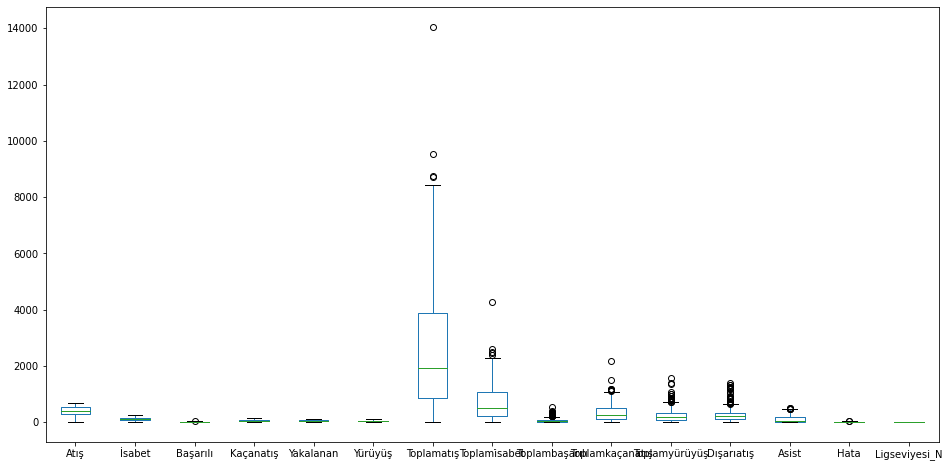

In [103]:
X.plot(kind = 'box', figsize = (16,8))

### Data içinde bazı değişkenlerde outlier mevcut, etkisini minimize etmek için RobustScaler uyguluyoruz, RobustScaler median based çalışan bir scaling tekniği. Outlier mevcut datalarda kullanılması gereken.

In [104]:
from sklearn.preprocessing import RobustScaler

In [105]:
rb = RobustScaler()

In [106]:
X_train = rb.fit_transform(X_train)
X_test = rb.transform(X_test)

In [107]:
model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report, f1_score

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.97      0.97      0.97        37
           N       0.97      0.97      0.97        29

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66

[[36  1]
 [ 1 28]]


### Modelimiz Yüzde 97 oranında doğru tahminleme yapmaktadır. A ve N sınıflandırmada 1'er tane hata yapmıştır.

### Soru 10: İlgili veri setinden “Tesadüfi Örnekleme” yaklaşımı ile n=10 hacminde 10 adet örnek oluşturup örneklem istatistiklerini hesaplayarak parametre değerleri ile karşılaştırınız. (Yorumlamada kuramsal bilgilerden ve teoremlerden faydalanabilirsiniz.) (10p)

In [108]:
samples = np.array([df.drop(['Oyuncular', 'Ligseviyesi', 'Ligsonuseviye', 'Yenisezonseviyesi'], axis = 1).sample(10).values for i in range(1, 11)])

In [109]:
np.array([df.drop(['Oyuncular', 'Ligseviyesi', 'Ligsonuseviye', 'Yenisezonseviyesi'], axis = 1).sample(10).values for i in range(1, 11)]).shape

(10, 10, 17)

In [110]:
df['Atış'].mean()

403.6425855513308

In [111]:
samples.mean(axis = 1)[:,0]

array([392.7, 397.5, 394.4, 366.3, 418. , 449.1, 425.4, 376.4, 433.4,
       411.5])

In [112]:
df.mean()

Atış                403.642586
İsabet              107.828897
Başarılı             11.619772
Kaçanatış            54.745247
Yakalanan            51.486692
Yürüyüş              41.114068
Tecrübe(yıl)          7.311787
Toplamatış         2657.543726
Toplami̇sabet       722.186312
Toplambaşarılı       69.239544
Toplamkaçanatış     361.220532
Toplamatış.1        330.418251
Toplamyürüyüş       260.266160
Dışarıatış          290.711027
Asist               118.760456
Hata                  8.593156
Yıllıkmaaş          535.925882
dtype: float64

###  Aldığımız örneklerin Atış değişkeninin ortalamalarının dağılımı kde plot olarak çizildi. Tüm datanın atış ortalaması ise dikey çizgi olarak çizildi

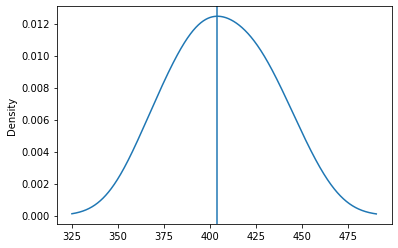

In [113]:
pd.Series(samples.mean(axis = 1)[:,0]).plot(kind = 'kde')
plt.axvline(df.mean()[0])

###  Aldığımız örneklerin İsabet değişkeninin ortalamalarının dağılımı kde plot olarak çizildi. Tüm datanın atış ortalaması ise dikey çizgi olarak çizildi

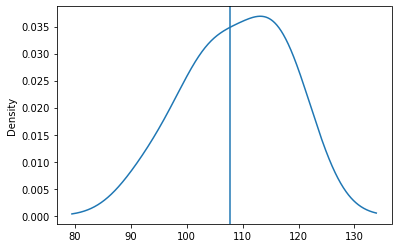

In [114]:
pd.Series(samples.mean(axis = 1)[:,1]).plot(kind = 'kde')
plt.axvline(df.mean()[1])

In [115]:
df.mean()   # istediğimiz değişkeni kontrol edebiliriz. Atış = 0, İsabet = 1 .......

Atış                403.642586
İsabet              107.828897
Başarılı             11.619772
Kaçanatış            54.745247
Yakalanan            51.486692
Yürüyüş              41.114068
Tecrübe(yıl)          7.311787
Toplamatış         2657.543726
Toplami̇sabet       722.186312
Toplambaşarılı       69.239544
Toplamkaçanatış     361.220532
Toplamatış.1        330.418251
Toplamyürüyüş       260.266160
Dışarıatış          290.711027
Asist               118.760456
Hata                  8.593156
Yıllıkmaaş          535.925882
dtype: float64

### Dağılımlar kontrol edildiğinde aldığımız örneklemlerin dağılımı datamızın istatistiğini yansıtmaktadır.

### Aşağıdaki interaktif grafikle örneklem adedini ve büyüklüğünü değiştirebilerek, değişimi daha iyi görebiliriz.

In [116]:
for i in range(1, 11):
    exec(f'df_{i} = df.sample(10)')

In [117]:
from ipywidgets import interact

In [118]:
@interact
def asd(sample_size = (1, 20, 1), n = (10, 2000, 100)):
    samples = np.array([df.drop(['Oyuncular', 'Ligseviyesi', 'Ligsonuseviye', 'Yenisezonseviyesi'], axis = 1).sample(sample_size).values for i in range(n)])
    
    pd.Series(samples.mean(axis = 1)[:,0]).plot(kind = 'kde')
    plt.axvline(df.mean()[0])
    plt.xlim(0, 800)
    plt.ylim(0, 0.02)

interactive(children=(IntSlider(value=10, description='sample_size', max=20, min=1), IntSlider(value=910, desc…

### Soru 11: Bir yarışma programında kırmızı yeşil ve mavi boyalı üç tane kapı gösterilmektedir. Bu kapılardan birinin arkasında büyük ödül bulunmaktadır. Yarışmacının Kırmızı kapıyı seçtiğini düşünelim. Program sunucusu hangi kapının arkasında ödül olduğunu bilmektedir. Ancak format gereği ne arkasında ödül olan kapıyı nede yarışmacının seçtiği kapıyı açabilir. Program sunucusu Yeşil kapıyı açar ve arkasında ödül olmadığını gösterir ve yarışmacıya «İlk tercihiniz olan Kırmızı kapıyı değiştirmek ister misiniz?» diye sorar. Ödülün mavi veya kırmızı kapılar arkasında bulunma olasılıkları nedir? Monte Carlo simülasyonu kullanarak modelleyiniz. (10p)

#### Monte Carlo simülasyonunu 50000 iterasyon ile gerçekleştirdik. kapi değişkeni 3 kapıyı göstermektedir. ödül değişkenine ise her defasında bir tane 1 eklenmektedir, ödülü gösteren. 10000 defa tekrarlanması sonrasında ödülün sunucunun açmadığımavi veya kırmızı kapılarda olma ihtimali 0.66'dır.

In [124]:
skorlar = []
for _ in range(50000):
    ödül = np.array([0, 0, 0])
    kapi = np.array([0, 1, 2])
    
    ödül[np.random.randint(0,3)] = 1
    
    yarismaci = np.random.randint(0,3)
    
    sunucu = np.random.choice(kapi[(kapi != secilen) & (ödül != 1)])
    
    skorlar.append(yarismaci == ödül.argmax())

1 - np.mean(skorlar)

0.66354